## Real Estate Price Prediction using Machine Learning

#### Introduction

Real Estate Price Prediction is the process of estimating or forecasting the 
future prices of real estate properties, such as houses, apartments, or commercial buildings.

The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions. 


#### steps:

1.Gather relevant data real estate.

2.Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations.

3.Create new features or transform existing ones to capture important information that can influence real estate prices.

4.Explore and visualize the data to gain insights into its distribution, correlations, and patterns.

5.Choose appropriate machine learning algorithms or predictive models for the task.

6.Train the selected model on the training data, optimizing its parameters to make accurate predictions.

7.Set up a new Dash application.

8.Create the layout of the app using Dash’s HTML and Core Components. It includes input fields, buttons, and output display areas.

9.Write callback functions to define the interactivity of the app, such as taking user inputs, running the model prediction, and displaying the results.

10.Load the model within the app to use for predictions.

#### Reading Data

In [2]:
import pandas as pd

# Load the dataset
real_estate_data = pd.read_csv(r"C:\Users\ELCOT\Desktop\data science class\sample data\Real_Estate.csv")

# Display the first few rows of the dataset and the info about the dataset
real_estate_data_head = real_estate_data.head()
data_info = real_estate_data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

#### MEANS OF COLUMNS

Transaction date: The date of the real estate transaction.
    
House age: Age of the house in years.
    
Distance to the nearest MRT station: Distance to the nearest Mass
Rapid Transit station in meters.

Number of convenience stores: Number of convenience stores in the vicinity.
    
Latitude: Latitude of the property location.
    
Longitude: Longitude of the property location.
    
House price of unit area: House price of unit area.

In [3]:
#if the data contains any null values or not
print(real_estate_data_head.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [4]:
#descriptive statistics of the dataset
descriptive_stats=real_estate_data.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

#### Basic Skimming on Data

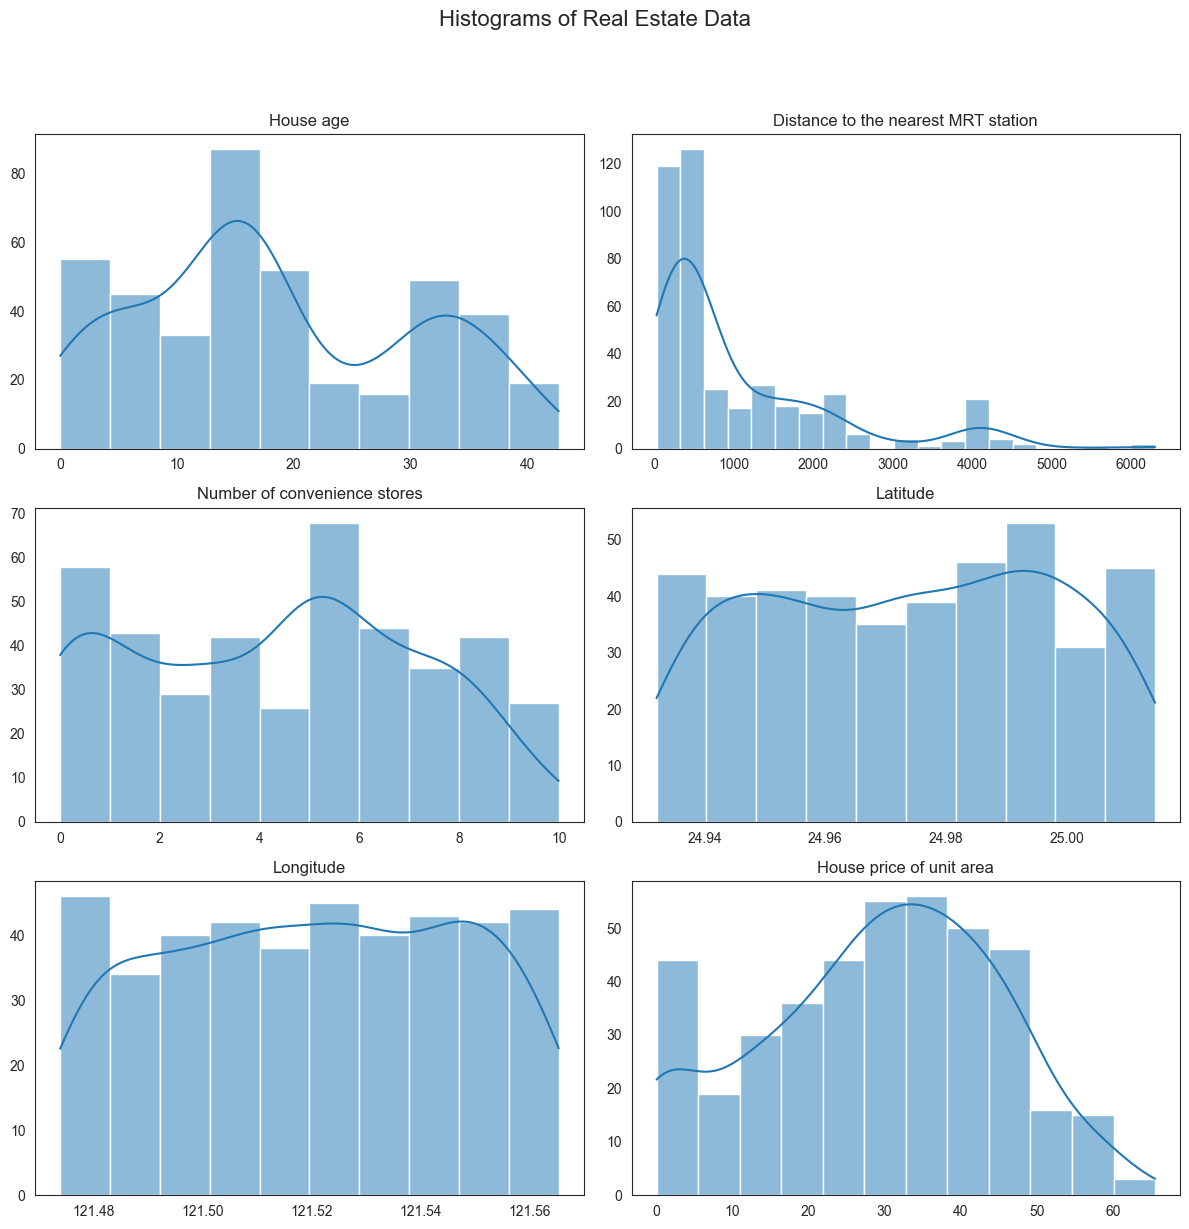

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the aesthetic style of the plots
sns.set_style("white")

# create histograms for the numerical columns
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12,18))
fig.suptitle("Histograms of Real Estate Data",fontsize=16)

cols=['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i,col in enumerate(cols):
    sns.histplot(real_estate_data[col],kde=True,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    axes[i//2,i%2].set_xlabel("")
    axes[i//2,i%2].set_ylabel("")
    
plt.tight_layout(rect=[0,0.3,1,0.95])
plt.show()

House Age: This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

Distance to the Nearest MRT Station: Most properties are located close to an MRT station,as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts,like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

House Price of Unit Area: Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

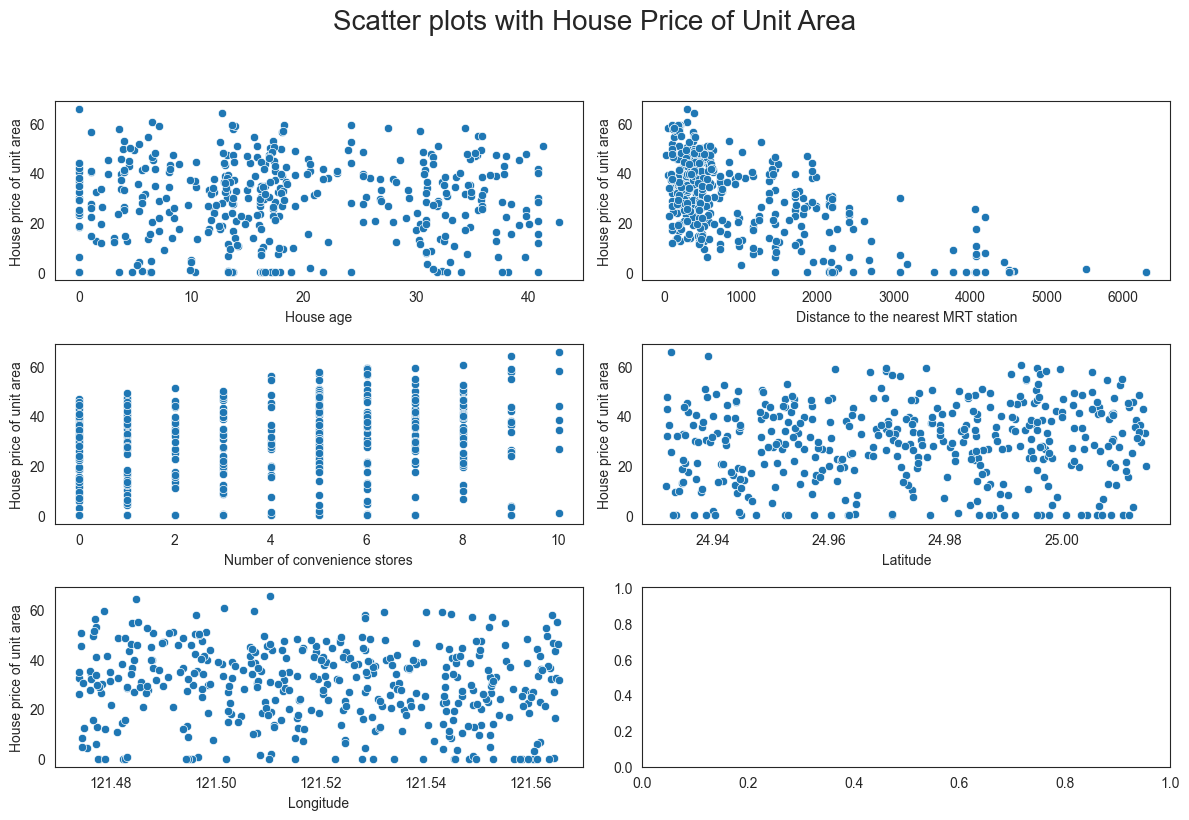

In [6]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
fig.suptitle("Scatter plots with House Price of Unit Area",fontsize=20)

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])
sns.scatterplot(data=real_estate_data, x='Longitude', y='House price of unit area', ax=axes[2, 0])


plt.tight_layout(rect=[0, 0.3, 1, 0.95])
plt.show()


House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.

Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease.It suggests a strong negative relationship between these two variables.

Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.

Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices and also same as Longitude.It could be indicative of specific neighbourhoods being more desirable.

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

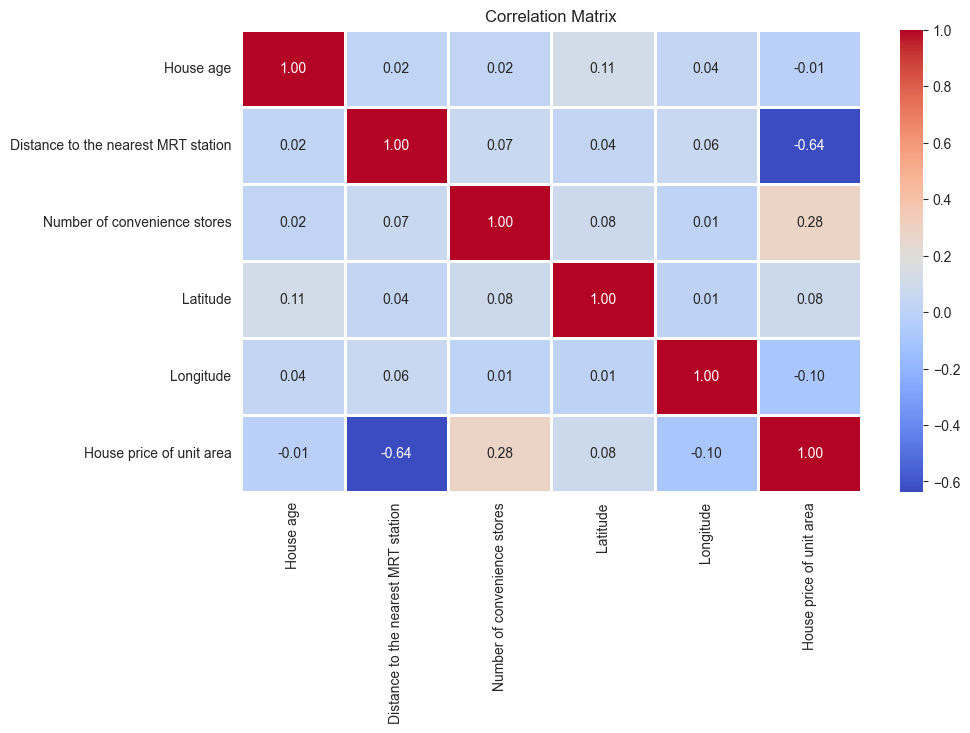

In [7]:
# Correlation matrix
real_estate_data_not_td= real_estate_data.drop("Transaction date",axis=1)
correlation_matrix = real_estate_data_not_td.corr()
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0)
plt.title('Correlation Matrix')
plt.show()

House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.

Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

Latitude and Longitude: Both show a weak correlation with house prices.Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

#### Linear Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

# convert "Transaction date" to datetime and extract year and month
real_estate_data['Transaction date'] = pd.to_datetime(real_estate_data['Transaction date'])
real_estate_data['Transaction year'] = real_estate_data['Transaction date'].dt.year
real_estate_data['Transaction month'] = real_estate_data['Transaction date'].dt.month

# drop the original "Transaction date" as we've extracted relevant features
real_estate_data_td = real_estate_data.drop(columns=['Transaction date'])

# define features and target variable
X = real_estate_data_td.drop('House price of unit area', axis=1)
y = real_estate_data_td['House price of unit area']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(331, 7)
(83, 7)


Model Training and Comparison

1.Linear Regression: A good baseline model for regression tasks.

2.Decision Tree Regressor: To see how a simple tree-based model performs.

3.Random Forest Regressor: An ensemble method to improve upon the decision tree’s performance.

4.Gradient Boosting Regressor: Another powerful ensemble method for regression.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# dictionary to hold the evaluation metrics for each model
results = {}

# train and evaluate each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


Linear Regression has the lowest MAE (9.75) and the highest R² (0.53), making it the best-performing model among those evaluated. It suggests that, despite its simplicity, Linear Regression is quite effective for this dataset.

Decision Tree Regressor shows the highest MAE (11.76) and the lowest R² (0.20), indicating it may be overfitting to the training data and performing poorly on the test data. On the other hand, Random Forest Regressor and Gradient Boosting Regressor have similar MAEs (9.89 and 10.00, respectively) and R² scores (0.51 and 0.48, respectively), performing slightly worse than the Linear Regression model but better than the Decision Tree.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

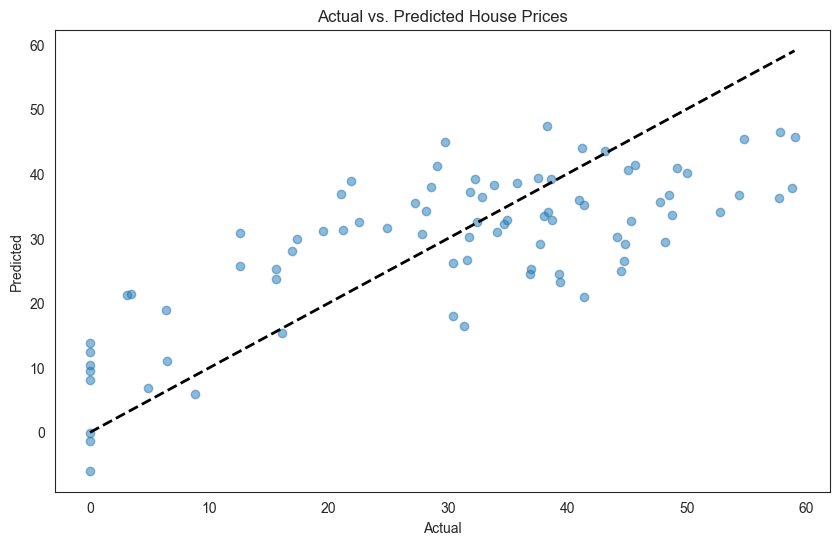

In [10]:
# Making predictions using the linear regression model
y_pred = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.

Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

#### Dash Framework

In [13]:
import dash
from dash import html, dcc, Input, Output, State

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
real_estate_data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
